# Домашнє завдання №10

### Частина 1

Cтворення згорткової нейронної мережі, яка буде класифікувати товари із датасету fashion_mnist. Підбір гіперпараметрів

#### 1.1. Завантаження і підготовка даних

In [2]:
from tensorflow import keras

from keras.datasets import fashion_mnist
# датасет із зображеннями одягу та взуття, містить 60 000 тренувальних зображень і 10 000 тестових зображень розміром 28x28 пікселів, представляючи одяг у 10 різних класах

from keras.models import Sequential

from keras.layers import Dense

from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import BatchNormalization, Dropout

import numpy as np

import matplotlib.pyplot as plt

In [3]:
# Розпакування даних з load_data на тренувальні та тестові дані, а також відповідні мітки (labels)
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
# Нормалізуємо значення пікселів
x_train, x_test = x_train / 255., x_test / 255.

# Для використання згорткової моделі додаємо один канал для кожного зображення, перетворюючи його в тривимірний обсяг (28, 28, 1)
x_train = x_train.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))

#### 1.2. Модель №1

In [ ]:
model = keras.Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=(28,28, 1)))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
# створюється 32 фільтри розміром (3,3), які рухаються по вхідному зображенню
# padding='same' вказує на додавання нулів до країв зображення, щоб зберегти розмір

# використовується пулінг з розміром (2, 2), що веде до зменшення розміру кожного зображення у два рази

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

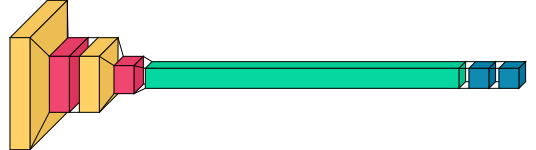

In [ ]:
# Візуалізуємо шарову структуру моделі
!pip install visualkeras

import visualkeras

visualkeras.layered_view(model)

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['sparse_categorical_accuracy']
    )

In [ ]:
model_name = 'model_1'

history = model.fit(x_train, y_train, epochs=15, validation_split=0.2)

# Оцінка точності на тестових даних
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

Epoch 1/15
1500/1500 [==============================] - 47s 31ms/step - loss: 0.4234 - sparse_categorical_accuracy: 0.8466 - val_loss: 0.3280 - val_sparse_categorical_accuracy: 0.8831
Epoch 2/15
1500/1500 [==============================] - 37s 25ms/step - loss: 0.2850 - sparse_categorical_accuracy: 0.8967 - val_loss: 0.2762 - val_sparse_categorical_accuracy: 0.9007
Epoch 3/15
1500/1500 [==============================] - 37s 25ms/step - loss: 0.2383 - sparse_categorical_accuracy: 0.9115 - val_loss: 0.2786 - val_sparse_categorical_accuracy: 0.9000
Epoch 4/15
1500/1500 [==============================] - 37s 25ms/step - loss: 0.2052 - sparse_categorical_accuracy: 0.9259 - val_loss: 0.2554 - val_sparse_categorical_accuracy: 0.9083
Epoch 5/15
1500/1500 [==============================] - 37s 24ms/step - loss: 0.1781 - sparse_categorical_accuracy: 0.9344 - val_loss: 0.2720 - val_sparse_categorical_accuracy: 0.9017
Epoch 6/15
1500/1500 [==============================] - 37s 24ms/step - loss: 0.

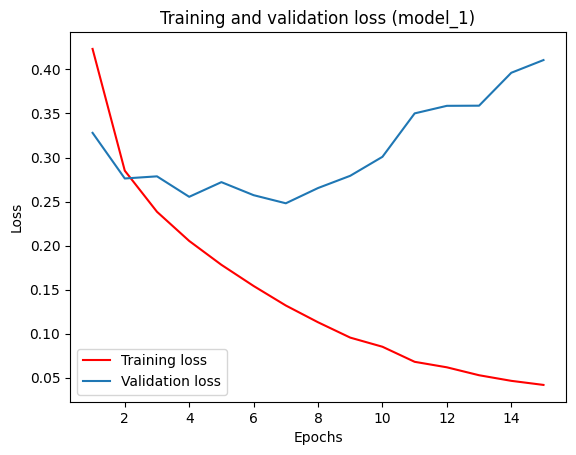

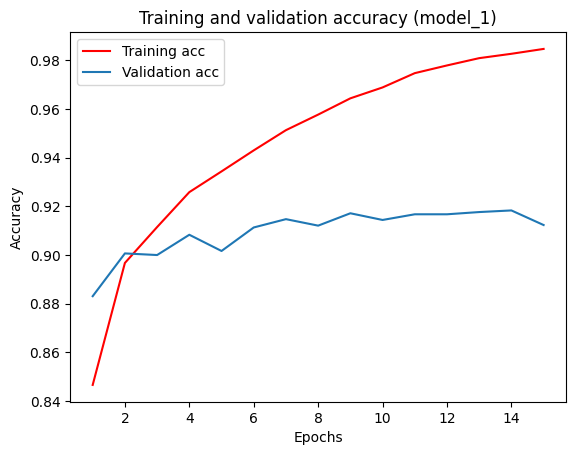

In [ ]:
# Візуалізуємо результати навчання
import matplotlib.pyplot as plt


history_dict = history.history

epochs = range(1, len(history_dict['sparse_categorical_accuracy']) + 1)

plt.plot(epochs, history_dict['loss'], label='Training loss', color="r")
plt.plot(epochs, history_dict['val_loss'], label='Validation loss')
plt.title(f'Training and validation loss ({model_name})')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
plt.plot(epochs, history_dict['sparse_categorical_accuracy'], label='Training acc', color="r")
plt.plot(epochs, history_dict['val_sparse_categorical_accuracy'], label='Validation acc')
plt.title(f'Training and validation accuracy ({model_name})')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

#### 1.3. Модель №2
В моделі №1 спостерігається перенавчання. Ускладнимо модель для вирішення цієї проблеми.

In [ ]:
model = keras.Sequential()

model.add(Conv2D(32, (3, 3), padding='same',  activation='relu', kernel_initializer='he_normal', input_shape=(28,28, 1)))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
# створюється 32 фільтри розміром (3,3), які рухаються по вхідному зображенню
# padding='same' вказує на додавання нулів до країв зображення, щоб зберегти розмір
# kernel_initializer='he_normal' - ініціалізує ваги шару так, що дисперсія вихідних значень активацій зберігається після проходження через шар
# використовується пулінг з розміром (2, 2), що веде до зменшення розміру кожного зображення у два рази

model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Conv2D(128, 3, padding='same', activation='relu'))
model.add(Conv2D(128, 3, padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.4))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(512, activation='relu'))

model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 5.5 MB/s eta 0:00:00


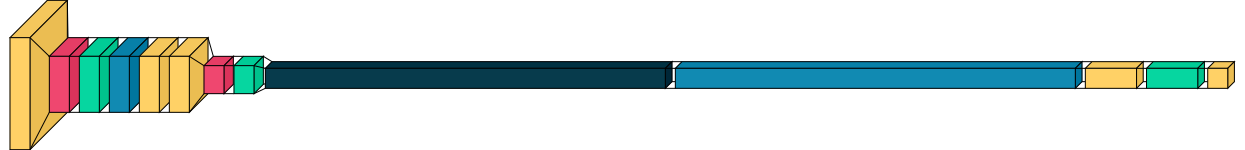

In [ ]:
# Візуалізуємо шарову структуру моделі
!pip install visualkeras

import visualkeras

visualkeras.layered_view(model)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 batch_normalization (Batch  (None, 14, 14, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       36992     
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 128)       1

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['sparse_categorical_accuracy']
    )

In [ ]:
model_name = 'model_2'

history = model.fit(x_train, y_train,  batch_size=128, epochs=15, validation_split=0.2)

# Оцінка точності на тестових даних
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

Epoch 1/15
375/375 [==============================] - 203s 534ms/step - loss: 0.5608 - sparse_categorical_accuracy: 0.8193 - val_loss: 0.4205 - val_sparse_categorical_accuracy: 0.8407
Epoch 2/15
375/375 [==============================] - 203s 540ms/step - loss: 0.3387 - sparse_categorical_accuracy: 0.8753 - val_loss: 0.2657 - val_sparse_categorical_accuracy: 0.9006
Epoch 3/15
375/375 [==============================] - 198s 528ms/step - loss: 0.2958 - sparse_categorical_accuracy: 0.8909 - val_loss: 0.2742 - val_sparse_categorical_accuracy: 0.9034
Epoch 4/15
375/375 [==============================] - 197s 527ms/step - loss: 0.2697 - sparse_categorical_accuracy: 0.9005 - val_loss: 0.2381 - val_sparse_categorical_accuracy: 0.9105
Epoch 5/15
375/375 [==============================] - 198s 528ms/step - loss: 0.2525 - sparse_categorical_accuracy: 0.9056 - val_loss: 0.2245 - val_sparse_categorical_accuracy: 0.9180
Epoch 6/15
375/375 [==============================] - 206s 549ms/step - loss: 0.

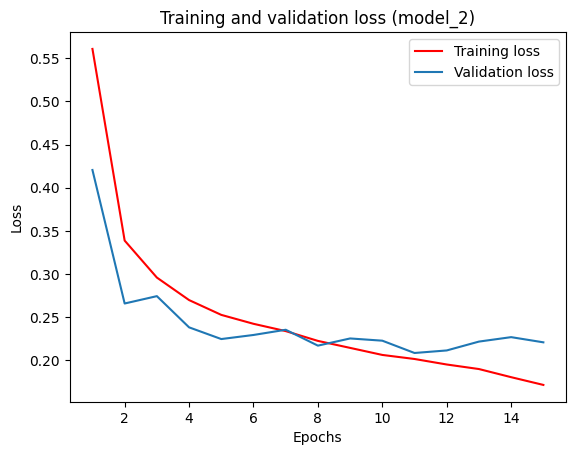

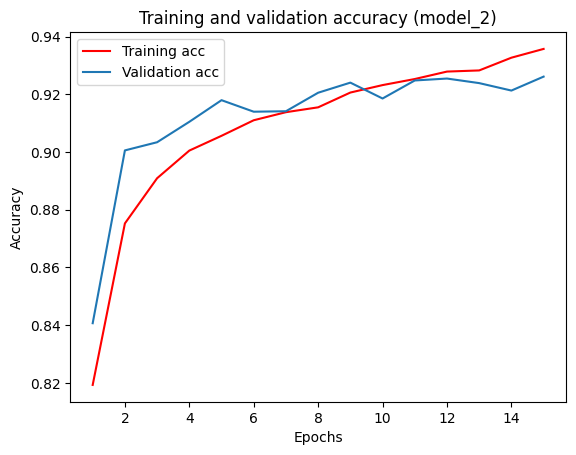

In [ ]:
# Візуалізуємо результати навчання
import matplotlib.pyplot as plt


history_dict = history.history

epochs = range(1, len(history_dict['sparse_categorical_accuracy']) + 1)

plt.plot(epochs, history_dict['loss'], label='Training loss', color="r")
plt.plot(epochs, history_dict['val_loss'], label='Validation loss')
plt.title(f'Training and validation loss ({model_name})')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
plt.plot(epochs, history_dict['sparse_categorical_accuracy'], label='Training acc', color="r")
plt.plot(epochs, history_dict['val_sparse_categorical_accuracy'], label='Validation acc')
plt.title(f'Training and validation accuracy ({model_name})')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

Бачимо, що проблема перенавчання зникла. При необхідності, можна ще підвищити точність за рахунок збільшення кількості епох.

### Частина 2

Cтворення згорткової нейронної мережі з VGG16 в якості згорткової основи, яка буде класифікувати товари із датасету fashion_mnist. Під час навчання використати прийоми донавчання та виділення ознак.

#### 2.1. Виділення ознак (feature extraction)

Взяти основу попередньо навченої мережі, потім "прикріпити" до неї повнозв'язний класифікатор і навчити його на нових даних.

Оскільки Fashion-MNIST містить чорно-білі зображення розміром 28x28, для використання VGG16, яка очікує кольорові зображення розміром 32x32, потрібно буде змінити розмір та кількість каналів. Давайте використаємо ImageDataGenerator для цього.

In [5]:
from tensorflow import keras
import numpy as np
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Sequential
from keras.layers import Dense, Flatten
import cv2

# Завантаження та підготовка даних Fashion-MNIST
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Нормалізація та розширення розмірів зображень
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
# Зміна розміру: train_images.reshape((60000, 28, 28, 1)) перетворює розмір масиву зображень з
# (60000, 28, 28) (60000 зображень розміром 28x28 пікселів) в (60000, 28, 28, 1). Остання ось (1)
# додається для вказання одного каналу (оскільки це чорно-білі зображення, є тільки один канал).
# Нормалізація: .astype('float32') / 255 конвертує тип даних з цілих чисел у числа з рухомою комою
# та нормалізує значення пікселів до діапазону від 0 до 1, ділячи кожне значення на 255.
# Це важливо для нейромережі, оскільки дозволяє полегшити процес навчання та поліпшити збіжність моделі.
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255


# Перетворення зображення з формату сірого в кольоровий формат RGB (модель VGG16 приймає зображення з трьома каналами (RGB))
train_images = [cv2.cvtColor(image, cv2.COLOR_GRAY2RGB) for image in train_images]
test_images = [cv2.cvtColor(image, cv2.COLOR_GRAY2RGB) for image in test_images]
train_images = np.array(train_images)
test_images = np.array(test_images)

# Змінення розміру зображень на (48, 48) для забезпечення сумісності з VGG16
train_images_resized = []
test_images_resized = []

for img in train_images:
    train_images_resized.append(cv2.resize(img, (48, 48)))

for img in test_images:
    test_images_resized.append(cv2.resize(img, (48, 48)))

train_images = np.array(train_images_resized)
test_images = np.array(test_images_resized)

# Перетворення міток в категоріальний формат
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Створення VGG16 без верхнього повнозв'язаного шару
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))
# weights='imagenet': ваги моделі повинні завантажуватися з попередньо навченої моделі на наборі даних ImageNet.
# ImageNet - це великий набір даних для розпізнавання об'єктів, який включає тисячі класів.
# Ваги, навчені на ImageNet, можуть бути використані як ефективний вихідний пункт для подальших завдань.
# include_top=False: верхні (fully connected) шари моделі (які відповідають за класифікацію в тисячах класів ImageNet)
# не повинні включатися. Ми  додаватимемо свій власний классифікатор поверх цієї згорткової основи, і тому верхні шари не потрібні.
# input_shape=(48, 48, 3): розмір вхідних зображень, які використовуються.
# У цьому випадку припускається, що вхідні зображення мають розмір 48x48 пікселів і три канали (RGB).

# Заморожуємо ваги базової моделі
conv_base.trainable = False

58889256/58889256 [==============================] - 0s 0us/step


In [6]:
# Створимо згорткову нейромережу, що використовує VGG16 як згортковий шар
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))  # Для 10 класів Fashion-MNIST

model.compile(
    loss="categorical_crossentropy",
    optimizer=keras.optimizers.RMSprop(learning_rate=2e-5),
    metrics=["accuracy"]
)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 256)               131328    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 14848586 (56.64 MB)
Trainable params: 133898 (523.04 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [ ]:
# Візуалізуємо шарову структуру моделі
# !pip install visualkeras

import visualkeras

visualkeras.layered_view(model)

In [ ]:
model_name = 'model_3'

history = model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_split=0.2)

# Оцінка точності на тестових даних
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

Epoch 1/10
1500/1500 [==============================] - 1727s 1s/step - loss: 1.4918 - accuracy: 0.6188 - val_loss: 0.9442 - val_accuracy: 0.7504
Epoch 2/10
1500/1500 [==============================] - 1784s 1s/step - loss: 0.7801 - accuracy: 0.7719 - val_loss: 0.6840 - val_accuracy: 0.7810
Epoch 3/10
1500/1500 [==============================] - 1637s 1s/step - loss: 0.6335 - accuracy: 0.7942 - val_loss: 0.6029 - val_accuracy: 0.7986
Epoch 4/10
1500/1500 [==============================] - 1592s 1s/step - loss: 0.5739 - accuracy: 0.8058 - val_loss: 0.5599 - val_accuracy: 0.8091
Epoch 5/10
1500/1500 [==============================] - 1574s 1s/step - loss: 0.5383 - accuracy: 0.8146 - val_loss: 0.5316 - val_accuracy: 0.8169
Epoch 6/10
1500/1500 [==============================] - 1581s 1s/step - loss: 0.5144 - accuracy: 0.8211 - val_loss: 0.5120 - val_accuracy: 0.8201
Epoch 7/10
1500/1500 [==============================] - 1588s 1s/step - loss: 0.4963 - accuracy: 0.8248 - val_loss: 0.4965 -

In [ ]:
# Збереження всієї моделі
model.save("model_3")

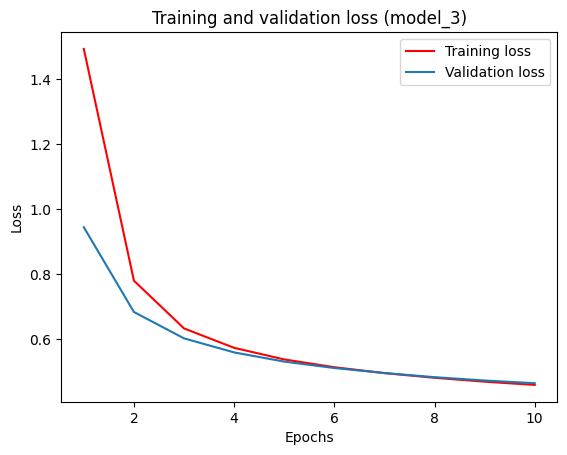

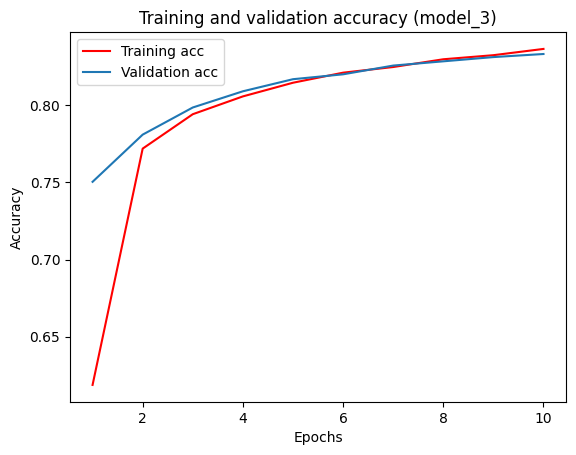

In [ ]:
# Візуалізуємо результати навчання
import matplotlib.pyplot as plt


history_dict = history.history

epochs = range(1, len(history_dict['loss']) + 1)

plt.plot(epochs, history_dict['loss'], label='Training loss', color="r")
plt.plot(epochs, history_dict['val_loss'], label='Validation loss')
plt.title(f'Training and validation loss ({model_name})')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
plt.plot(epochs, history_dict['accuracy'], label='Training acc', color="r")
plt.plot(epochs, history_dict['val_accuracy'], label='Validation acc')
plt.title(f'Training and validation accuracy ({model_name})')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

Бачимо, що використання в якості основи згорткової мережі VGG16, при навчанні протягом 10 епох, дає точність 82%. Далі застосуємо прийом донавчання.

#### 2.2. Донавчання нейромережі з основою VGG16

Цей підхід полягає в "розморожуванні" декількох верхніх шарів замороженої моделі, яка використовувалася для виділення ознак, і спільному навчанні нової доданої частини моделі (в даному випадку повнозв'язкового класифікатора) і цих верхніх шарів.

Для донавчання мережі потрібно виконати такі кроки:

- Додати свою мережу поверх навченої базової мережі.
- Заморозити базову мережу.
- Навчити додану частину.
- Розморозити кілька шарів у базовій мережі.
- Навчити ці шари та додану частину разом.

Ми вже виконали перші три кроки, коли виділяли ознаки. Тепер виконаємо четвертий крок розморозивши кілька шарів у conv_base.

In [7]:
# Згадаймо, як виглядає наша згортна основа
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0     

In [8]:
# Зробимо донавчання останніх трьох шарів, а саме: block5_conv1, block5_conv2 та block5_conv3.
# Інші шари залишимо без змін.
conv_base.trainable = True  # всі шари (layers) моделі conv_base тепер можна тренувати
set_trainable = False  # встановлює початкове значення змінної, яка буде використовуватися для визначення того, чи ми повинні тренувати певний шар
for layer in conv_base.layers:  # перебирає всі шари в моделі conv_base
    if layer.name == "block5_conv1":
        set_trainable = True  # Якщо поточний шар має ім'я "block5_conv1", то встановлює змінну set_trainable в значення True. Це означає, що всі наступні шари будуть тренуватися
    if set_trainable:
        layer.trainable = True  # встановлюється можливість тренування для поточного шару
    else:
        layer.trainable = False  # поточний шар "заморожується"

In [9]:
# Створимо модифіковану згорткову нейромережу
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))  # Для 10 класів Fashion-MNIST

model.compile(
    loss="categorical_crossentropy",
    optimizer=keras.optimizers.RMSprop(learning_rate=2e-5),
    metrics=["accuracy"]
)

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 14848586 (56.64 MB)
Trainable params: 7213322 (27.52 MB)
Non-trainable params: 7635264 (29.13 MB)
_________________________________________________________________


In [11]:
# Візуалізуємо шарову структуру моделі
!pip install visualkeras

import visualkeras

visualkeras.layered_view(model)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 7.4 MB/s eta 0:00:00


In [12]:
model_name = 'model_4'

history = model.fit(train_images, train_labels, epochs=12, batch_size=32, validation_split=0.2)

# Оцінка точності на тестових даних
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

Epoch 1/12
1500/1500 [==============================] - 2145s 1s/step - loss: 0.3968 - accuracy: 0.8603 - val_loss: 0.3261 - val_accuracy: 0.8825
Epoch 2/12
1500/1500 [==============================] - 2114s 1s/step - loss: 0.2706 - accuracy: 0.9014 - val_loss: 0.2750 - val_accuracy: 0.8972
Epoch 3/12
1500/1500 [==============================] - 2124s 1s/step - loss: 0.2314 - accuracy: 0.9161 - val_loss: 0.2526 - val_accuracy: 0.9091
Epoch 4/12
1500/1500 [==============================] - 2107s 1s/step - loss: 0.2072 - accuracy: 0.9234 - val_loss: 0.2707 - val_accuracy: 0.9032
Epoch 5/12
1500/1500 [==============================] - 2097s 1s/step - loss: 0.1857 - accuracy: 0.9315 - val_loss: 0.2448 - val_accuracy: 0.9126
Epoch 6/12
1500/1500 [==============================] - 2105s 1s/step - loss: 0.1699 - accuracy: 0.9380 - val_loss: 0.2230 - val_accuracy: 0.9213
Epoch 7/12
1500/1500 [==============================] - 2101s 1s/step - loss: 0.1540 - accuracy: 0.9455 - val_loss: 0.2234 -

In [13]:
# Збереження всієї моделі
model.save("model_4")

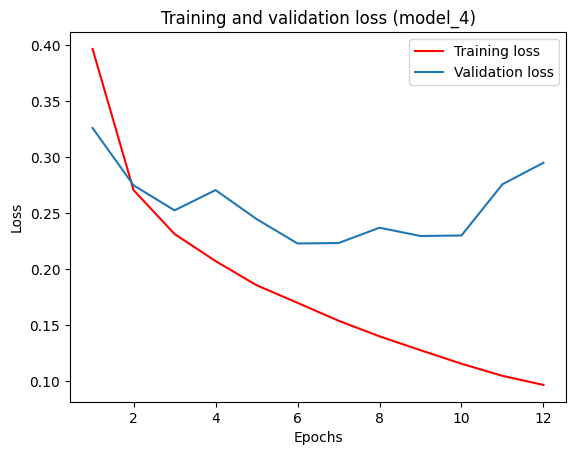

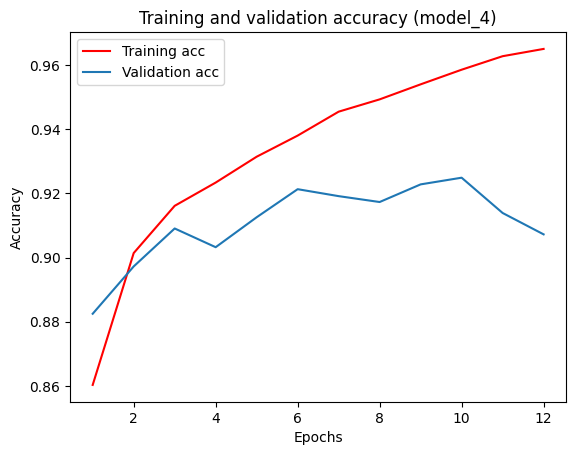

In [14]:
# Візуалізуємо результати навчання
import matplotlib.pyplot as plt


history_dict = history.history

epochs = range(1, len(history_dict['loss']) + 1)

plt.plot(epochs, history_dict['loss'], label='Training loss', color="r")
plt.plot(epochs, history_dict['val_loss'], label='Validation loss')
plt.title(f'Training and validation loss ({model_name})')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
plt.plot(epochs, history_dict['accuracy'], label='Training acc', color="r")
plt.plot(epochs, history_dict['val_accuracy'], label='Validation acc')
plt.title(f'Training and validation accuracy ({model_name})')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

Наведемо Confusion Matrix для розуміння якості моделі №4 для класифікації по різних класах.

In [19]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

# Завантаження попередньо навченої моделі (припустимо, що ви вже навчили модель)
from keras.models import load_model
model = load_model('model_4')

# Отримання прогнозованих класів для тестового набору
y_pred_prob = model.predict(test_images)
y_pred = np.argmax(y_pred_prob, axis=1)

313/313 [==============================] - 248s 792ms/step


In [22]:
# Побудова Confusion Matrix
conf_matrix = confusion_matrix(np.argmax(test_labels, axis=1), y_pred)

# Вивід Confusion Matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[820   3  58   8   0   0 104   0   7   0]
 [  1 990   1   5   0   0   1   0   2   0]
 [  3   1 953   6  14   0  23   0   0   0]
 [ 16  22  42 858  26   0  31   0   5   0]
 [  0   1 180  10 773   0  36   0   0   0]
 [  0   0   0   0   0 979   0  18   2   1]
 [ 81   3 144  13  49   0 701   0   9   0]
 [  0   0   0   0   0   3   0 977   2  18]
 [  2   0   3   2   0   0   0   0 993   0]
 [  0   0   1   0   0   5   0  21   0 973]]


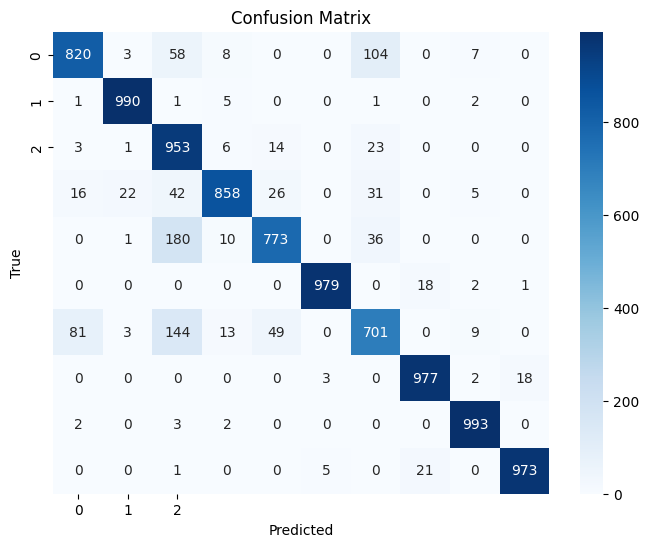


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.82      0.85      1000
           1       0.97      0.99      0.98      1000
           2       0.69      0.95      0.80      1000
           3       0.95      0.86      0.90      1000
           4       0.90      0.77      0.83      1000
           5       0.99      0.98      0.99      1000
           6       0.78      0.70      0.74      1000
           7       0.96      0.98      0.97      1000
           8       0.97      0.99      0.98      1000
           9       0.98      0.97      0.98      1000

    accuracy                           0.90     10000
   macro avg       0.91      0.90      0.90     10000
weighted avg       0.91      0.90      0.90     10000



In [24]:
# Візуалізація Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Отримання і вивід іншої важливої інформації
print("\nClassification Report:")
print(classification_report(np.argmax(test_labels, axis=1), y_pred))

## Висновки

Донавчання останніх трьох шарів поліпшило Accuracy з 82 до 90% порівняно з моделлю №3. В той же час графіки залежностей Loss та Accuracy стали показувати появу ефекту перенавчання. Також слід зауважити, що для навчання моделі №4 необхідна суттєва кількість часу (десь 7 годин для 12 епох).

Бачимо, що класифікація для деяких класів гірша, тут є простір для покращення якості моделі.
Порівняно з моделлю №2 з першої частини завдання, Accuracy моделі №2 досягла 92%. Навчання її відбувалося значно швидше. Тому можна зробити висновок, що на даному етапі модель №2 більш ефективна.
